In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_data = pd.read_csv(r'../datasets/train_data.csv')
validation_data = pd.read_csv(r'../datasets/validation_data.csv')
test_data = pd.read_csv(r'../datasets/test_data.csv')

In [6]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [7]:
train_data['MonthID'] = train_data['DateID'].apply(lambda value: int(value.split('/')[0]))
train_data['Year'] = train_data['DateID'].apply(lambda value: int(value.split('/')[2]))
train_data['WeekID'] = train_data['DateID'].apply(lambda value: pd.Period(value).week)

In [8]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales,MonthID,Year,WeekID
0,category_2,117610,11/6/2021,7,11,2021,44
1,category_4,836584,11/18/2021,16,11,2021,46
2,category_1,370195,1/24/2022,6,1,2022,4
3,category_2,172582,10/30/2021,5,10,2021,43
4,category_2,1006009,10/30/2021,5,10,2021,43


In [9]:
train_data.shape

(19921, 7)

In [10]:
group_by_week = train_data.groupby(['WeekID', 'CategoryCode', 'ItemCode', 'MonthID', 'Year'])['DailySales'].sum().reset_index()

In [11]:
group_by_week.head()

,WeekID,CategoryCode,ItemCode,MonthID,Year,DailySales
0,1,category_1,3418,1,2022,83
1,1,category_1,3427,1,2022,66
2,1,category_1,17287,1,2022,21
3,1,category_1,17296,1,2022,621
4,1,category_1,24136,1,2022,31


In [12]:
group_by_week.describe()

,WeekID,ItemCode,MonthID,Year,DailySales
count,4278.000000,4.278000e+03,4278.000000,4278.000000,4278.000000
mean,33.474053,6.332211e+05,7.698691,2021.339411,34.234923
std,19.725594,4.536411e+05,4.676653,0.473565,69.277279
min,1.000000,3.418000e+03,1.000000,2021.000000,1.000000
25%,5.000000,1.184132e+05,1.000000,2021.000000,7.000000
50%,43.000000,8.588860e+05,10.000000,2021.000000,15.000000
75%,48.000000,1.063600e+06,11.000000,2022.000000,33.750000
max,52.000000,1.105027e+06,12.000000,2022.000000,909.000000


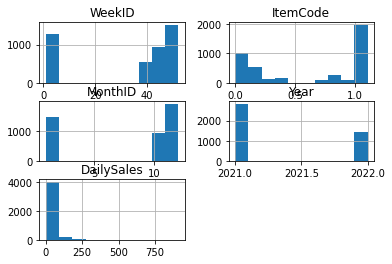

In [13]:
group_by_week.hist()
plt.show()

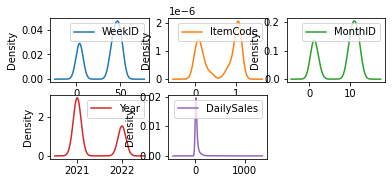

In [14]:
group_by_week.plot(kind='density', subplots=True, sharex=False, layout=(3, 3))
plt.show()